In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
fashion_train = pd.read_csv('D:/GH/fashion-mnist_train.csv',sep = ',')

In [4]:
fashion_test = pd.read_csv('D:/GH/fashion-mnist_test.csv',sep = ',')

In [5]:
fashion_test.shape

(10000, 785)

In [22]:
training = np.array(fashion_train)

In [23]:
testing= np.array(fashion_test)


In [24]:
testing

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       ...,
       [8, 0, 0, ..., 0, 1, 0],
       [8, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

1

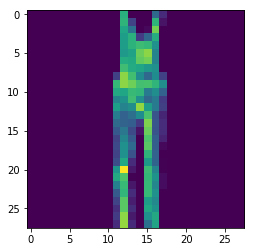

In [25]:
import random
i= random.randint(1,40000)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,0]
label

In [ ]:
# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot

In [29]:
X_train = training[:,1:]
y_train = training[:,0]

In [30]:
X_test = testing[:,1:]
y_test = testing[:,0]

In [31]:
X_test.shape

(10000, 784)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_validate,y_train,y_validate = train_test_split(X_train, y_train,test_size = 0.2, random_state = 12345)

In [34]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [36]:

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [37]:
cnn_model = Sequential()

In [38]:
cnn_model.add(Conv2D(32,3,3, input_shape = (28,28,1),activation = 'relu'))

C:\Users\Sk Mobin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [39]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [40]:
cnn_model.add(Flatten())

In [42]:
cnn_model.add(Dense(output_dim = 32, activation = 'relu' ))

C:\Users\Sk Mobin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [43]:
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid' ))

C:\Users\Sk Mobin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [44]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr=0.001),metrics =['accuracy'])

In [58]:
cnn_model.fit(
    X_train, y_train, batch_size=128,
    epochs=10, verbose=1,
    validation_data=(X_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 25s 522us/step - loss: 0.2183 - acc: 0.9162 - val_loss: 0.3363 - val_acc: 0.8944
Epoch 2/10
48000/48000 [==============================] - 24s 503us/step - loss: 0.2024 - acc: 0.9227 - val_loss: 0.3174 - val_acc: 0.8951
Epoch 3/10
48000/48000 [==============================] - 24s 497us/step - loss: 0.1840 - acc: 0.9283 - val_loss: 0.3245 - val_acc: 0.8958
Epoch 4/10
48000/48000 [==============================] - 25s 512us/step - loss: 0.1740 - acc: 0.9328 - val_loss: 0.3443 - val_acc: 0.8955
Epoch 5/10
48000/48000 [==============================] - 24s 507us/step - loss: 0.1645 - acc: 0.9368 - val_loss: 0.3470 - val_acc: 0.8998
Epoch 6/10
48000/48000 [==============================] - 24s 506us/step - loss: 0.1535 - acc: 0.9404 - val_loss: 0.3713 - val_acc: 0.8937: 0.1531 - 
Epoch 7/10
48000/48000 [==============================] - 24s 504us/step - loss: 0.1446 - acc: 0.9444 - v

In [46]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('{: .3f}'.format(evaluation[1]))

10000/10000 [==============================] - 2s 220us/step
 0.896


In [47]:
predicted_classes = cnn_model.predict_classes(X_test)

In [48]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

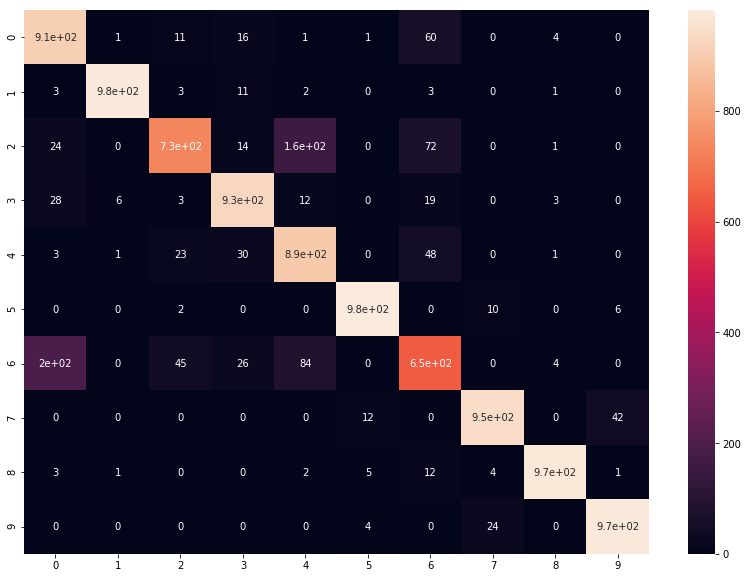

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot= True)

In [55]:
import numpy as np
import cv2
image = cv2.imread(r'D:\SM\MP\project\tshirt-img\pullover1.jpg', 0)
res = cv2.resize(image, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
res=res.reshape(1,28,28,1)

In [57]:
cnn_model.predict_classes(res)

array([2], dtype=int64)

In [30]:
import pickle
with open('model_pickle','wb') as f:
    pickle.dump(cnn_model,f)

In [ ]:
# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot

NameError: name 'pickle' is not defined